### **Combined-Cycle Power Plant Electricity Output Prediction** ###

In [1]:
# Import Libraries for Data Pre-processing
import zipfile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import SVM Libraries
from sklearn.svm import SVR as svr

# Import KNN Libraries
from sklearn.neighbors import KNeighborsRegressor  as knnr

# Import GPR Libraries
from sklearn.gaussian_process import GaussianProcessRegressor

# Import RFR Libraries
from sklearn.ensemble import RandomForestRegressor

# Import RIDGE Libraries
from sklearn.linear_model import Ridge

# Import LASSO Libraries
from sklearn.linear_model import Lasso

# Import ELASTIC_NET Libraries
from sklearn.linear_model import ElasticNet

# Import ANN Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### **First Look At The Data** ###

In [2]:
# Read dataset
data = pd.read_csv("/content/Folds5x2_pp.csv")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Split the inputs from the outputs
datain = data.iloc[:,:-1]
dataou = pd.DataFrame(data.iloc[:,-1])

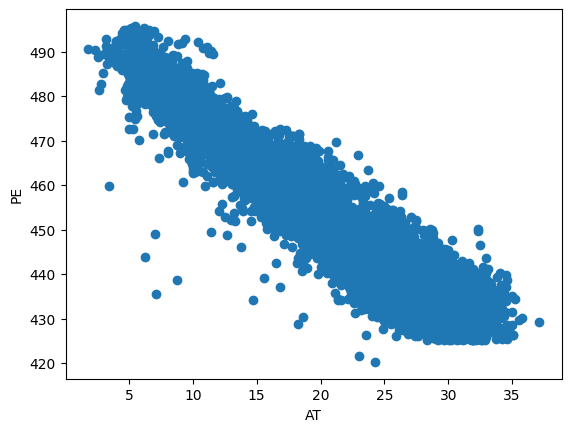

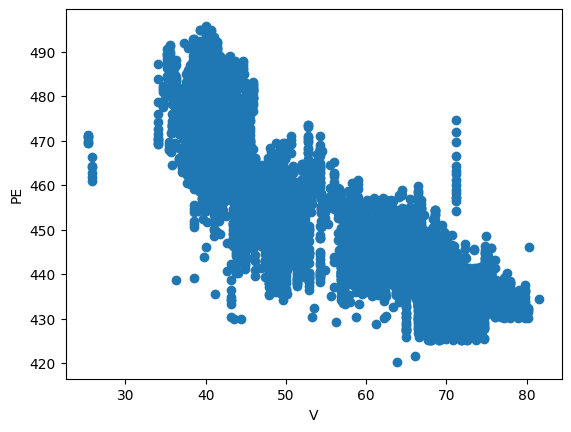

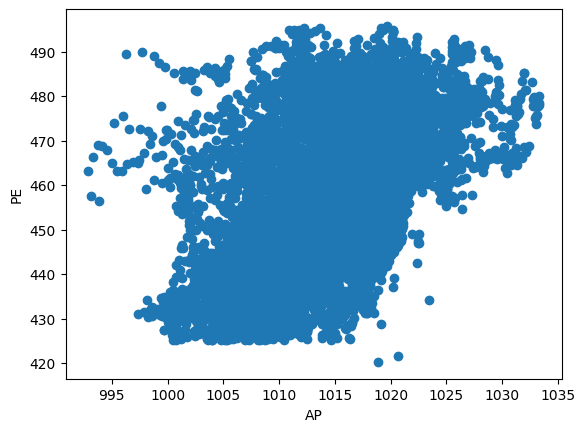

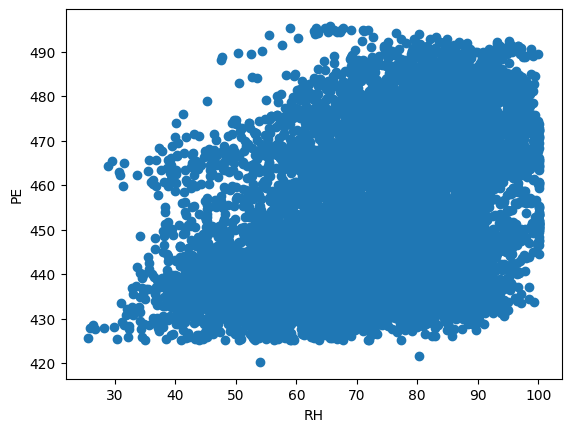

In [4]:
# Make initial plots of data to understand structure
for col in datain.columns:
  output_label = dataou.columns[0]
  plt.scatter((datain[col])**1,(dataou)**1)
  plt.xlabel(col)
  plt.ylabel(output_label)
  plt.show()

### **Pre-processing Functions** ###

In [5]:
# Data Preprocessing
def data_prep(datain,dataou,rtt):

  # Split the data into training and testing
  datain_tr,datain_te,dataou_tr,dataou_te = train_test_split(datain,dataou,test_size=rtt,random_state=42)

  # Scale the input data
  scalerin = MinMaxScaler(feature_range=(0,1))
  scalerin.fit(datain_tr)
  datain_tr_scaled = scalerin.transform(datain_tr)
  datain_te_scaled = scalerin.transform(datain_te)

  # Scale the output data
  scalerou = MinMaxScaler(feature_range=(0,1))
  scalerou.fit(dataou_tr)
  dataou_tr_scaled = scalerou.transform(dataou_tr)
  dataou_te_scaled = scalerou.transform(dataou_te)

  return datain_tr_scaled, datain_te_scaled, dataou_tr_scaled, dataou_te_scaled

### **Post-processing Functions** ###

In [6]:
# Mean Absolute Error Function
def mae(dataou,dataes):
  return sum(np.abs(dataou.ravel() - dataes))/len(dataou)

# Mean Squared Value Function
def mse(dataou,dataes):
  return sum((dataou.ravel() - dataes)**2)/len(dataou)

# Scatter Plot Functions
def scatter_bisector_plots(dataou_tr,dataes_tr,dataou_te,dataes_te):
  plt.plot(dataou_tr,dataes_tr,'.')
  plt.plot([0,1],[0,1]);
  plt.title('Training'), plt.xlabel('Observation'), plt.ylabel('Estimate')
  plt.show()
  plt.scatter(dataou_te,dataes_te)
  plt.plot([0,1],[0,1]);
  plt.title('Testing'), plt.xlabel('Observation'), plt.ylabel('Estimate')
  plt.show()
  training_mae = mae(dataou_tr,dataes_tr)
  training_mse = mse(dataou_tr,dataes_tr)
  testing_mae = mae(dataou_te,dataes_te)
  testing_mse = mse(dataou_te,dataes_te)
  #print("Training MAE: {:.4f}".format(training_mae))
  #print("Training MSE: {:.4f}".format(training_mse))
  #print("Testing MAE: {:.4f}".format(testing_mae))
  #print("Testing MSE: {:.4f}".format(testing_mse))

def performance_table(matrix,model_labels):
  df = pd.DataFrame(matrix)
  df.index = model_labels
  return df

### **Model Training Functions** ###

In [7]:
# SVM Model training functions
def train_pred_svm(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):
  model = svr()
  model.fit(datain_tr_scaled,dataou_tr_scaled.ravel())
  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled)

In [8]:
# KNN Model Training Function
def train_pred_knn(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):
  model = knnr()
  model.fit(datain_tr_scaled,dataou_tr_scaled.ravel())
  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled)

In [9]:
# GPR Model Training Function
def train_pred_gpr(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):
  model = GaussianProcessRegressor()
  model.fit(datain_tr_scaled,dataou_tr_scaled.ravel())
  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled)

In [10]:
# RFR Model Training Function
def train_pred_rfr(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):
  model = RandomForestRegressor()
  model.fit(datain_tr_scaled,dataou_tr_scaled.ravel())
  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled)

In [11]:
# RIDGE Model Training Function
def train_pred_ridge(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):
  model = Ridge(alpha=0.1)
  model.fit(datain_tr_scaled,dataou_tr_scaled.ravel())
  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled)

In [12]:
# LASSO Model Training Function
def train_pred_lasso(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):
  model = Lasso(alpha=0.01)
  model.fit(datain_tr_scaled,dataou_tr_scaled.ravel())
  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled)

In [13]:
# ELASTIC-NET Model Training Function
def train_pred_elasticnet(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):
  model = ElasticNet(alpha=0.01,l1_ratio=0.5)
  model.fit(datain_tr_scaled,dataou_tr_scaled.ravel())
  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled)

In [14]:
# DNN Model Training Function
def train_pred_dnn(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled):

  # Unpack parameters
  training_routine = 'adam'
  loss_function = 'mean_squared_error'
  val_split = 0.05
  iterations = 250
  show_iterations = 0
  shuffle_condition = True
  data_batch_size = 16
  hidden_layers = [75,50,25,10]
  drop_rate = [0.1,0.1,0.1,0.1]
  activation_function = ['relu','relu','relu','relu']

  # Define model
  model = tf.keras.models.Sequential()

  # Create Inpuut Layer
  model.add(Dense(hidden_layers[0],activation=activation_function[0],input_dim=datain_tr_scaled.shape[1]))
  model.add(Dropout(rate=drop_rate[0]))

  # Create Hidden Layers
  for i in np.arange(1,len(hidden_layers)):
    model.add(Dense(hidden_layers[i],activation=activation_function[i]))
    model.add(Dropout(rate=drop_rate[i]))

  # Create Output Layer
  model.add(Dense(dataou_tr_scaled.shape[1],activation=activation_function[-1]))

  # Compile model and define optimization routine and objective function
  model.compile(optimizer=training_routine,loss=loss_function)

  # Show model summary
  #model.summary()

  # Fit Model
  model_fit = model.fit(datain_tr_scaled,dataou_tr_scaled.ravel(),    # Dataset
                        epochs=iterations,                    # Iterations
                        batch_size=data_batch_size,           # Batch size
                        verbose=show_iterations,              # Show iterations
                        shuffle=shuffle_condition,            # Shuffle
                        validation_split=val_split)           # Validation split

  return model.predict(datain_tr_scaled), model.predict(datain_te_scaled), model_fit

### **Run All Models** ###

In [ ]:
RTT = [0.1,0.3,0.5]
RRS = 5
rtt_count = 0
plcount = 1
mae_tr = np.zeros((len(RTT*8),RRS))
mae_te = np.zeros((len(RTT*8),RRS))
mse_tr = np.zeros((len(RTT*8),RRS))
mse_te = np.zeros((len(RTT*8),RRS))

# Create figures for training plots
f1 = plt.figure(figsize=(15,20))   # RIDGE
f2 = plt.figure(figsize=(15,20))   # LASSO
f3 = plt.figure(figsize=(15,20))   # ELASTIC
f4 = plt.figure(figsize=(15,20))   # SVM
f5 = plt.figure(figsize=(15,20))   # KNN
f6 = plt.figure(figsize=(15,20))   # GPR
f7 = plt.figure(figsize=(15,20))   # RFR
f8 = plt.figure(figsize=(15,20))   # DNN
f9 = plt.figure(figsize=(15,120))   # DNN

# Put super titles
f1.suptitle("RIDGE: Training Data", fontsize=28)
f2.suptitle("LASSO: Training Data", fontsize=28)
f3.suptitle("ELASTIC: Training Data", fontsize=28)
f4.suptitle("SVM: Training Data", fontsize=28)
f5.suptitle("KNN: Training Data", fontsize=28)
f6.suptitle("GPR: Training Data", fontsize=28)
f7.suptitle("RFR: Training Data", fontsize=28)
f8.suptitle("DNN Training Data", fontsize=28)
f9.suptitle("DNN Convergence and Validation", fontsize=28)

# Create figures for testing plots
g1 = plt.figure(figsize=(15,20))   # RIDGE
g2 = plt.figure(figsize=(15,20))   # LASSO
g3 = plt.figure(figsize=(15,20))   # ELASTIC
g4 = plt.figure(figsize=(15,20))   # SVM
g5 = plt.figure(figsize=(15,20))   # KNN
g6 = plt.figure(figsize=(15,20))   # GPR
g7 = plt.figure(figsize=(15,20))   # RFR
g8 = plt.figure(figsize=(15,20))   # DNN

# Put super titles
g1.suptitle("RIDGE: Testing Data", fontsize=28)
g2.suptitle("LASSO: Testing Data", fontsize=28)
g3.suptitle("ELASTIC: Testing Data", fontsize=28)
g4.suptitle("SVM: Testing Data", fontsize=28)
g5.suptitle("KNN: Testing Data", fontsize=28)
g6.suptitle("GPR: Testing Data", fontsize=28)
g7.suptitle("RFR: Testing Data", fontsize=28)
g8.suptitle("DNN: Testing Data", fontsize=28)

# Create Model Labels to produce the tables
model_labels = []
for rtt in RTT:
  model_labels.extend(['RTT = ' + str(rtt) + ', RIDGE',
                  'RTT = ' + str(rtt) + ', LASSO',
                  'RTT = ' + str(rtt) + ', ELASTIC',
                  'RTT = ' + str(rtt) + ', SVM',
                  'RTT = ' + str(rtt) + ', KNN',
                  'RTT = ' + str(rtt) + ', GPR',
                  'RTT = ' + str(rtt) + ', RFR',
                  'RTT = ' + str(rtt) + ', DNN'])

for rtt in RTT:
  for rrs in np.arange(RRS):

    # Prompt User the RTT and RRS
    print("RTT = " + str(rtt) + ", RRS = " + str(rrs))

    # Call pre-processor
    datain_tr_scaled, datain_te_scaled, dataou_tr_scaled, dataou_te_scaled = data_prep(datain,dataou,rtt)

    # Train Ridge
    print('Training Ridge')
    dataes_tr_scaled, dataes_te_scaled = train_pred_ridge(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled)
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled)
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled)
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled)
    mae_tr[0+8*rtt_count,rrs] = training_mae
    mse_tr[0+8*rtt_count,rrs] = training_mse
    mae_te[0+8*rtt_count,rrs] = testing_mae
    mse_te[0+8*rtt_count,rrs] = testing_mse
    ax1 = f1.add_subplot(len(RTT),RRS,plcount)
    ax1.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax1.plot([0,1],[0,1]);                                          # Bisector Line
    ax1.set_xlabel('Observations');
    ax1.set_ylabel('Predictions');
    ax1.legend(['Data','Bisector Line']);
    ax1.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx1 = g1.add_subplot(len(RTT),RRS,plcount)
    bx1.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx1.plot([0,1],[0,1]);                                          # Bisector Line
    bx1.set_xlabel('Observations');
    bx1.set_ylabel('Predictions');
    bx1.legend(['Data','Bisector Line']);
    bx1.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));

    # Train Lasso
    print('Training Lasso')
    dataes_tr_scaled, dataes_te_scaled = train_pred_lasso(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled)
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled)
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled)
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled)
    mae_tr[1+8*rtt_count,rrs] = training_mae
    mse_tr[1+8*rtt_count,rrs] = training_mse
    mae_te[1+8*rtt_count,rrs] = testing_mae
    mse_te[1+8*rtt_count,rrs] = testing_mse
    ax2 = f2.add_subplot(len(RTT),RRS,plcount)
    ax2.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax2.plot([0,1],[0,1]);                                          # Bisector Line
    ax2.set_xlabel('Observations');
    ax2.set_ylabel('Predictions');
    ax2.legend(['Data','Bisector Line']);
    ax2.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx2 = g2.add_subplot(len(RTT),RRS,plcount)
    bx2.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx2.plot([0,1],[0,1]);                                          # Bisector Line
    bx2.set_xlabel('Observations');
    bx2.set_ylabel('Predictions');
    bx2.legend(['Data','Bisector Line']);
    bx2.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));

    # Train ElasticNet
    print('Training Elastic-Net')
    dataes_tr_scaled, dataes_te_scaled = train_pred_elasticnet(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled)
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled)
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled)
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled)
    mae_tr[2+8*rtt_count,rrs] = training_mae
    mse_tr[2+8*rtt_count,rrs] = training_mse
    mae_te[2+8*rtt_count,rrs] = testing_mae
    mse_te[2+8*rtt_count,rrs] = testing_mse
    ax3 = f3.add_subplot(len(RTT),RRS,plcount)
    ax3.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax3.plot([0,1],[0,1]);                                          # Bisector Line
    ax3.set_xlabel('Observations');
    ax3.set_ylabel('Predictions');
    ax3.legend(['Data','Bisector Line']);
    ax3.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx3 = g3.add_subplot(len(RTT),RRS,plcount)
    bx3.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx3.plot([0,1],[0,1]);                                          # Bisector Line
    bx3.set_xlabel('Observations');
    bx3.set_ylabel('Predictions');
    bx3.legend(['Data','Bisector Line']);
    bx3.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));


    # Train SVM
    print('Training SVM')
    dataes_tr_scaled, dataes_te_scaled = train_pred_svm(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled)
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled)
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled)
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled)
    mae_tr[3+8*rtt_count,rrs] = training_mae
    mse_tr[3+8*rtt_count,rrs] = training_mse
    mae_te[3+8*rtt_count,rrs] = testing_mae
    mse_te[3+8*rtt_count,rrs] = testing_mse
    ax4 = f4.add_subplot(len(RTT),RRS,plcount)
    ax4.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax4.plot([0,1],[0,1]);                                          # Bisector Line
    ax4.set_xlabel('Observations');
    ax4.set_ylabel('Predictions');
    ax4.legend(['Data','Bisector Line']);
    ax4.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx4 = g4.add_subplot(len(RTT),RRS,plcount)
    bx4.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx4.plot([0,1],[0,1]);                                          # Bisector Line
    bx4.set_xlabel('Observations');
    bx4.set_ylabel('Predictions');
    bx4.legend(['Data','Bisector Line']);
    bx4.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));

    # Train KNN
    print('Training KNN')
    dataes_tr_scaled, dataes_te_scaled = train_pred_knn(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled)
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled)
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled)
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled)
    mae_tr[4+8*rtt_count,rrs] = training_mae
    mse_tr[4+8*rtt_count,rrs] = training_mse
    mae_te[4+8*rtt_count,rrs] = testing_mae
    mse_te[4+8*rtt_count,rrs] = testing_mse
    ax5 = f5.add_subplot(len(RTT),RRS,plcount)
    ax5.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax5.plot([0,1],[0,1]);                                          # Bisector Line
    ax5.set_xlabel('Observations');
    ax5.set_ylabel('Predictions');
    ax5.legend(['Data','Bisector Line']);
    ax5.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx5 = g5.add_subplot(len(RTT),RRS,plcount)
    bx5.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx5.plot([0,1],[0,1]);                                          # Bisector Line
    bx5.set_xlabel('Observations');
    bx5.set_ylabel('Predictions');
    bx5.legend(['Data','Bisector Line']);
    bx5.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));

    # Train GPR
    print('Training GPR')
    dataes_tr_scaled, dataes_te_scaled = train_pred_gpr(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled)
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled)
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled)
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled)
    mae_tr[5+8*rtt_count,rrs] = training_mae
    mse_tr[5+8*rtt_count,rrs] = training_mse
    mae_te[5+8*rtt_count,rrs] = testing_mae
    mse_te[5+8*rtt_count,rrs] = testing_mse
    ax6 = f6.add_subplot(len(RTT),RRS,plcount)
    ax6.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax6.plot([0,1],[0,1]);                                          # Bisector Line
    ax6.set_xlabel('Observations');
    ax6.set_ylabel('Predictions');
    ax6.legend(['Data','Bisector Line']);
    ax6.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx6 = g6.add_subplot(len(RTT),RRS,plcount)
    bx6.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx6.plot([0,1],[0,1]);                                          # Bisector Line
    bx6.set_xlabel('Observations');
    bx6.set_ylabel('Predictions');
    bx6.legend(['Data','Bisector Line']);
    bx6.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));

    # Train RFR
    print('Training RFR')
    dataes_tr_scaled, dataes_te_scaled = train_pred_rfr(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled)
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled)
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled)
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled)
    mae_tr[6+8*rtt_count,rrs] = training_mae
    mse_tr[6+8*rtt_count,rrs] = training_mse
    mae_te[6+8*rtt_count,rrs] = testing_mae
    mse_te[6+8*rtt_count,rrs] = testing_mse
    ax7 = f7.add_subplot(len(RTT),RRS,plcount)
    ax7.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax7.plot([0,1],[0,1]);                                          # Bisector Line
    ax7.set_xlabel('Observations');
    ax7.set_ylabel('Predictions');
    ax7.legend(['Data','Bisector Line']);
    ax7.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx7 = g7.add_subplot(len(RTT),RRS,plcount)
    bx7.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx7.plot([0,1],[0,1]);                                          # Bisector Line
    bx7.set_xlabel('Observations');
    bx7.set_ylabel('Predictions');
    bx7.legend(['Data','Bisector Line']);
    bx7.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));

    # Train DNN
    print('Training DNN')
    dataes_tr_scaled, dataes_te_scaled, dnn_fit = train_pred_dnn(datain_tr_scaled,dataou_tr_scaled,datain_te_scaled)
    training_mae = mae(dataou_tr_scaled,dataes_tr_scaled.ravel())
    training_mse = mse(dataou_tr_scaled,dataes_tr_scaled.ravel())
    testing_mae = mae(dataou_te_scaled,dataes_te_scaled.ravel())
    testing_mse = mse(dataou_te_scaled,dataes_te_scaled.ravel())
    mae_tr[7+8*rtt_count,rrs] = training_mae
    mse_tr[7+8*rtt_count,rrs] = training_mse
    mae_te[7+8*rtt_count,rrs] = testing_mae
    mse_te[7+8*rtt_count,rrs] = testing_mse
    ax8 = f8.add_subplot(len(RTT),RRS,plcount)
    ax8.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    ax8.plot([0,1],[0,1]);                                          # Bisector Line
    ax8.set_xlabel('Observations');
    ax8.set_ylabel('Predictions');
    ax8.legend(['Data','Bisector Line']);
    ax8.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    bx8 = g8.add_subplot(len(RTT),RRS,plcount)
    bx8.plot(dataou_tr_scaled,dataes_tr_scaled,'.',markersize=10);  # Predictions vs. Data
    bx8.plot([0,1],[0,1]);                                          # Bisector Line
    bx8.set_xlabel('Observations');
    bx8.set_ylabel('Predictions');
    bx8.legend(['Data','Bisector Line']);
    bx8.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    cx = f9.add_subplot(len(RTT)*RRS,1,plcount)
    cx.plot(np.log(dnn_fit.history['loss']),'--');
    cx.plot(np.log(dnn_fit.history['val_loss']),'--');
    cx.set_xlabel('Epoch')
    cx.set_ylabel('Model Loss');
    cx.legend(['Loss','Validation Loss']);
    cx.set_title('RTT = ' + str(rtt) + ', RRS = ' + str(rrs+1));
    #plt.show()
    plcount = plcount + 1
  rtt_count = rtt_count + 1


RTT = 0.1, RRS = 0
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RTT = 0.1, RRS = 1
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RTT = 0.1, RRS = 2
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RTT = 0.1, RRS = 3
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RTT = 0.1, RRS = 4
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RTT = 0.3, RRS = 0
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RTT = 0.3, RRS = 1
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RTT = 0.3, RRS = 2
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RTT = 0.3, RRS = 3
Training Ridge
Training Lasso
Training Elastic-Net
Training SVM
Training KNN
Training GPR
Training RFR
Training DNN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("Training MAE")
mae_tr_table = performance_table(mae_tr,model_labels)
mae_tr_table

In [ ]:
print("Training MSE")
mse_tr_table = performance_table(mse_tr,model_labels)
mse_tr_table

In [ ]:
print("Testing MAE")
mae_te_table = performance_table(mae_te,model_labels)
mae_te_table

In [ ]:
print("Testing MSE")
mse_te_table = performance_table(mse_te,model_labels)
mse_te_table